In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor 
import xgboost as xgb
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Read the csv file
df=pd.read_csv("/Users/noelm/Downloads/indian_songs_dataset_final_1.csv",encoding='latin1')
df

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,7eQl3Yqv35ioqUfveKHitE,"1wRPtKGflJrBx9BmLsSwlU,5GnnSrwNCGyfAU4zuIytiS",Tum Se Hi,Jab We Met,"Pritam,Mohit Chauhan",21-09-2007,321225,77.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2019-09-18T16:03:30Z,...,6,-7.842,1,0.0273,0.32800,0.000000,0.1250,0.608,130.015,4
1,6aPMWbbdhDhiJHlknZb9Yx,"4YRxDV8wJFPHPTeXepOstw,1SyKki7JI1AZNKwgNMkn25",Bekhayali (Arijit Singh Version) [From Kabir S...,Bekhayali (Arijit Singh Version) [From Kabir S...,"Arijit Singh,Sachet-Parampara",03-06-2019,370444,56.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2019-09-18T16:03:47Z,...,9,-4.767,0,0.0491,0.49100,0.000000,0.2430,0.345,172.121,3
2,6zCQF5tu7HVwU9shhKqiuF,"2kkQthS9OLpK4UqNWYqoVl,4YRxDV8wJFPHPTeXepOstw",Khamoshiyan,Khamoshiyan (Original Motion Picture Soundtrack),"Jeet Gannguli,Arijit Singh",29-12-2014,335709,69.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2019-09-18T16:03:57Z,...,2,-6.837,0,0.0272,0.63100,0.000000,0.1580,0.266,143.892,3
3,0qxTDueomxqHEUPwlD9y4S,"7HCqGPJcQTyGJ2yqntbuyr,3nQ125TJobosBH446Dsvvv,...",Iktara (From Wake Up Sid),Perfect 10: Love Story,"Amit Trivedi,Kavita Seth,Amitabh Bhattacharya",20-01-2012,251773,30.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2020-08-26T13:36:59Z,...,7,-7.514,1,0.0259,0.42900,0.000652,0.4660,0.399,80.013,4
4,4iFPsNzNV7V9KJgcOX7TEO,"2oSONSC9zQ4UonDKnLqksx,1wRPtKGflJrBx9BmLsSwlU",Tu Jaane Na,Ajab Prem Ki Ghazab Kahani (Original Motion Pi...,"Atif Aslam,Pritam",06-11-2009,341933,71.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2020-12-22T21:15:41Z,...,7,-3.969,1,0.0345,0.36100,0.000001,0.1330,0.829,120.042,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,13MzyV40LsbNrwiVebat88,6pU5oz09VUYtnFTd4P1Mxn,Balle Balle,God's Land,Ranjit Bawa,14-03-2023,175975,22.0,spotify:user:6k4vml2zfxualpid5pjz8woxz,2024-02-21T06:10:53Z,...,2,-7.172,1,0.3290,0.10500,0.000008,0.5720,0.751,81.961,4
4218,0weDybgIoozlzRXAisUYGT,6pU5oz09VUYtnFTd4P1Mxn,Look At Us,God's Land,Ranjit Bawa,14-03-2023,108292,34.0,spotify:user:6k4vml2zfxualpid5pjz8woxz,2024-02-21T06:10:57Z,...,6,-8.734,0,0.3590,0.00159,0.000000,0.0794,0.711,163.954,4
4219,7D8CvQ0wlT4mYKwFnEs1B1,182srEbrmnlFxcwkqZ0NR6,Saperra (Gang Jatt Di),Ruff Around The Edges,Raf Saperra,09-03-2023,182666,44.0,spotify:user:6k4vml2zfxualpid5pjz8woxz,2024-02-21T06:11:09Z,...,10,-8.217,1,0.0863,0.08000,0.000000,0.4520,0.935,90.056,4
4220,42lIM5kcQtIHQK7vcDxcUJ,182srEbrmnlFxcwkqZ0NR6,Taveet,Ruff Around The Edges,Raf Saperra,09-03-2023,305059,35.0,spotify:user:6k4vml2zfxualpid5pjz8woxz,2024-02-21T06:11:12Z,...,4,-6.560,0,0.1940,0.01210,0.000011,0.3840,0.765,139.954,4


In [3]:
# Display first 5 records in dataframe
print(df.head())

               Spotify ID                                         Artist IDs  \
0  7eQl3Yqv35ioqUfveKHitE      1wRPtKGflJrBx9BmLsSwlU,5GnnSrwNCGyfAU4zuIytiS   
1  6aPMWbbdhDhiJHlknZb9Yx      4YRxDV8wJFPHPTeXepOstw,1SyKki7JI1AZNKwgNMkn25   
2  6zCQF5tu7HVwU9shhKqiuF      2kkQthS9OLpK4UqNWYqoVl,4YRxDV8wJFPHPTeXepOstw   
3  0qxTDueomxqHEUPwlD9y4S  7HCqGPJcQTyGJ2yqntbuyr,3nQ125TJobosBH446Dsvvv,...   
4  4iFPsNzNV7V9KJgcOX7TEO      2oSONSC9zQ4UonDKnLqksx,1wRPtKGflJrBx9BmLsSwlU   

                                          Track Name  \
0                                          Tum Se Hi   
1  Bekhayali (Arijit Singh Version) [From Kabir S...   
2                                        Khamoshiyan   
3                          Iktara (From Wake Up Sid)   
4                                        Tu Jaane Na   

                                          Album Name  \
0                                         Jab We Met   
1  Bekhayali (Arijit Singh Version) [From Kabir S...   
2   Khamoshiya

In [4]:
# To get the total number of rows and columns in dataset
df.shape

(4222, 23)

In [5]:
# Check the datatype and non-null count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Spotify ID        4222 non-null   object 
 1   Artist IDs        4222 non-null   object 
 2   Track Name        4070 non-null   object 
 3   Album Name        4076 non-null   object 
 4   Artist Name(s)    4070 non-null   object 
 5   Release Date      4222 non-null   object 
 6   Duration (ms)     4222 non-null   int64  
 7   Popularity        4221 non-null   float64
 8   Added By          4222 non-null   object 
 9   Added At          4222 non-null   object 
 10  Genres            3836 non-null   object 
 11  Danceability      4222 non-null   float64
 12  Energy            4222 non-null   float64
 13  Key               4222 non-null   int64  
 14  Loudness          4222 non-null   float64
 15  Mode              4222 non-null   int64  
 16  Speechiness       4222 non-null   float64


In [6]:
# Check missing values
df.isnull().sum()

Spotify ID            0
Artist IDs            0
Track Name          152
Album Name          146
Artist Name(s)      152
Release Date          0
Duration (ms)         0
Popularity            1
Added By              0
Added At              0
Genres              386
Danceability          0
Energy                0
Key                   0
Loudness              0
Mode                  0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Time Signature        0
dtype: int64

In [7]:
# Drop all the rows where we have missing values
data = df.dropna()
data

,Spotify ID,Artist IDs,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,7eQl3Yqv35ioqUfveKHitE,"1wRPtKGflJrBx9BmLsSwlU,5GnnSrwNCGyfAU4zuIytiS",Tum Se Hi,Jab We Met,"Pritam,Mohit Chauhan",21-09-2007,321225,77.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2019-09-18T16:03:30Z,...,6,-7.842,1,0.0273,0.32800,0.000000,0.1250,0.608,130.015,4
1,6aPMWbbdhDhiJHlknZb9Yx,"4YRxDV8wJFPHPTeXepOstw,1SyKki7JI1AZNKwgNMkn25",Bekhayali (Arijit Singh Version) [From Kabir S...,Bekhayali (Arijit Singh Version) [From Kabir S...,"Arijit Singh,Sachet-Parampara",03-06-2019,370444,56.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2019-09-18T16:03:47Z,...,9,-4.767,0,0.0491,0.49100,0.000000,0.2430,0.345,172.121,3
2,6zCQF5tu7HVwU9shhKqiuF,"2kkQthS9OLpK4UqNWYqoVl,4YRxDV8wJFPHPTeXepOstw",Khamoshiyan,Khamoshiyan (Original Motion Picture Soundtrack),"Jeet Gannguli,Arijit Singh",29-12-2014,335709,69.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2019-09-18T16:03:57Z,...,2,-6.837,0,0.0272,0.63100,0.000000,0.1580,0.266,143.892,3
3,0qxTDueomxqHEUPwlD9y4S,"7HCqGPJcQTyGJ2yqntbuyr,3nQ125TJobosBH446Dsvvv,...",Iktara (From Wake Up Sid),Perfect 10: Love Story,"Amit Trivedi,Kavita Seth,Amitabh Bhattacharya",20-01-2012,251773,30.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2020-08-26T13:36:59Z,...,7,-7.514,1,0.0259,0.42900,0.000652,0.4660,0.399,80.013,4
4,4iFPsNzNV7V9KJgcOX7TEO,"2oSONSC9zQ4UonDKnLqksx,1wRPtKGflJrBx9BmLsSwlU",Tu Jaane Na,Ajab Prem Ki Ghazab Kahani (Original Motion Pi...,"Atif Aslam,Pritam",06-11-2009,341933,71.0,spotify:user:7mq9oy7pfjv07t9yjj4gj2qy9,2020-12-22T21:15:41Z,...,7,-3.969,1,0.0345,0.36100,0.000001,0.1330,0.829,120.042,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,13MzyV40LsbNrwiVebat88,6pU5oz09VUYtnFTd4P1Mxn,Balle Balle,God's Land,Ranjit Bawa,14-03-2023,175975,22.0,spotify:user:6k4vml2zfxualpid5pjz8woxz,2024-02-21T06:10:53Z,...,2,-7.172,1,0.3290,0.10500,0.000008,0.5720,0.751,81.961,4
4218,0weDybgIoozlzRXAisUYGT,6pU5oz09VUYtnFTd4P1Mxn,Look At Us,God's Land,Ranjit Bawa,14-03-2023,108292,34.0,spotify:user:6k4vml2zfxualpid5pjz8woxz,2024-02-21T06:10:57Z,...,6,-8.734,0,0.3590,0.00159,0.000000,0.0794,0.711,163.954,4
4219,7D8CvQ0wlT4mYKwFnEs1B1,182srEbrmnlFxcwkqZ0NR6,Saperra (Gang Jatt Di),Ruff Around The Edges,Raf Saperra,09-03-2023,182666,44.0,spotify:user:6k4vml2zfxualpid5pjz8woxz,2024-02-21T06:11:09Z,...,10,-8.217,1,0.0863,0.08000,0.000000,0.4520,0.935,90.056,4
4220,42lIM5kcQtIHQK7vcDxcUJ,182srEbrmnlFxcwkqZ0NR6,Taveet,Ruff Around The Edges,Raf Saperra,09-03-2023,305059,35.0,spotify:user:6k4vml2zfxualpid5pjz8woxz,2024-02-21T06:11:12Z,...,4,-6.560,0,0.1940,0.01210,0.000011,0.3840,0.765,139.954,4


In [8]:
# Check for missing values again
data.isnull().sum()

Spotify ID          0
Artist IDs          0
Track Name          0
Album Name          0
Artist Name(s)      0
Release Date        0
Duration (ms)       0
Popularity          0
Added By            0
Added At            0
Genres              0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Time Signature      0
dtype: int64

In [9]:
# No. of rows became less in new dataframe
data.shape

(3836, 23)

In [10]:
uni=data['Track Name'].nunique()
print("No of unique songs = ",uni)

No of unique songs =  2494


In [11]:
# Remove all duplicate songs keeping only the first occurance of that song
duplicate_songs = data[data.duplicated(subset=['Track Name'], keep='first')]
print(duplicate_songs)

                  Spotify ID  \
177   2kRzgmBlmhvFvCEgMHltWz   
302   3SHopOL3KEJ8PFl3vJdfmF   
338   7ouBSPZKQpm7zQz2leJXta   
339   3uL1IBFhg52VcQqOwAG01E   
340   3t3wsY5IdLVzB9WidegJSU   
...                      ...   
4022  595br74XSTX5V9YixYZdXC   
4030  23YGhMVq1wJYROCp2kr8yP   
4077  0xIuPDzJSnJywALez8dwKR   
4083  5XpRKTgWi6skmmQu5sSz8d   
4122  5qEFLzru66ilBHP6am3PwA   

                                             Artist IDs  \
177                              0oOet2f43PA68X5RxKobEy   
302       5bv6NvAYNuvd2Vq13nHdG3,4IKVDbCSBTxBeAsMKjAuTs   
338                              4YRxDV8wJFPHPTeXepOstw   
339       4YRxDV8wJFPHPTeXepOstw,5UJ2sHO2ELrgW6aXeRLTQQ   
340   2oSONSC9zQ4UonDKnLqksx,0oOet2f43PA68X5RxKobEy,...   
...                                                 ...   
4022      5IfJHO9jIE1GVuC517P3nr,07iEy1AecUPVzfC2J2gCHR   
4030      2FKWNmZWDBZR4dE5KX4plR,0OS0NZnK7TGIAWx8MkWNFN   
4077                             6LEG9Ld1aLImEFEVHdWNSB   
4083  1zrFFDzoE9XXyjEqqgD

In [12]:
# Size of duplicate songs
duplicate_songs.shape

(1342, 23)

In [13]:
# New dataframe with all unique songs 2484 - 1317 = 1167
df1 = data.drop_duplicates(subset=['Track Name'], keep='first')
df1.shape

(2494, 23)

In [14]:
# Drop the columns which are not required for the ML model
cols = ['Spotify ID', 'Artist IDs', 'Added By','Added At','Track Name', 'Album Name', 'Artist Name(s)', 'Release Date','Genres',
       'Duration (ms)']
df1 = df1.drop(columns=cols)
df1.shape

(2494, 13)

In [15]:
df1.columns

Index(['Popularity', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature'],
      dtype='object')

In [16]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [17]:
df1.loc[detect_outliers(df1,['Popularity', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature'])]

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
2725,0.0,0.648,0.88800,1,-5.503,1,0.3220,0.3510,0.000000,0.193,0.6570,103.460,3
42,40.0,0.215,0.14700,10,-14.797,1,0.0379,0.8640,0.000000,0.094,0.1450,85.120,4
1599,39.0,0.207,0.29700,5,-8.845,0,0.0336,0.7880,0.655000,0.708,0.0514,166.025,4
275,52.0,0.620,0.11100,6,-14.142,1,0.0355,0.8960,0.001350,0.113,0.4770,127.960,5
968,50.0,0.472,0.12200,4,-15.837,0,0.0357,0.5780,0.001570,0.120,0.0923,146.430,5
1073,8.0,0.415,0.00865,9,-19.003,1,0.0605,0.9760,0.000035,0.153,0.1110,139.482,5
1418,64.0,0.378,0.14600,6,-15.412,1,0.0403,0.8970,0.000016,0.122,0.1780,138.649,3
307,73.0,0.645,0.32400,1,-13.621,0,0.0545,0.7540,0.000727,0.103,0.4930,162.037,3
1183,70.0,0.556,0.20200,4,-16.397,1,0.0324,0.9150,0.038100,0.112,0.2000,145.017,3
1188,49.0,0.550,0.28900,4,-14.411,1,0.0358,0.8670,0.000015,0.893,0.5110,107.084,1


In [18]:
# drop outliers
df1 = df1.drop(detect_outliers(df1,['Popularity', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature']),axis = 0).reset_index(drop = True)

In [19]:
df1.shape

(2478, 13)

In [20]:
# Seperate into independant and dependant variables
# In Y we keep Popularity as the target variable for predicting and X contains all the other columns as independant variable
X = df1.iloc[:, np.r_[1:13]]
Y = df1.iloc[:, 0]
print(X.shape, Y.shape)

(2478, 12) (2478,)


In [21]:
X

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,0.609,0.538,6,-7.842,1,0.0273,0.32800,0.000000,0.1250,0.608,130.015,4
1,0.265,0.580,9,-4.767,0,0.0491,0.49100,0.000000,0.2430,0.345,172.121,3
2,0.527,0.521,2,-6.837,0,0.0272,0.63100,0.000000,0.1580,0.266,143.892,3
3,0.622,0.516,7,-7.514,1,0.0259,0.42900,0.000652,0.4660,0.399,80.013,4
4,0.702,0.860,7,-3.969,1,0.0345,0.36100,0.000001,0.1330,0.829,120.042,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0.738,0.784,2,-7.172,1,0.3290,0.10500,0.000008,0.5720,0.751,81.961,4
2474,0.707,0.632,6,-8.734,0,0.3590,0.00159,0.000000,0.0794,0.711,163.954,4
2475,0.724,0.879,10,-8.217,1,0.0863,0.08000,0.000000,0.4520,0.935,90.056,4
2476,0.731,0.792,4,-6.560,0,0.1940,0.01210,0.000011,0.3840,0.765,139.954,4


In [22]:
Y

0       77.0
1       56.0
2       69.0
3       30.0
4       71.0
        ... 
2473    22.0
2474    34.0
2475    44.0
2476    35.0
2477    68.0
Name: Popularity, Length: 2478, dtype: float64

In [23]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

C:\Users\noelm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


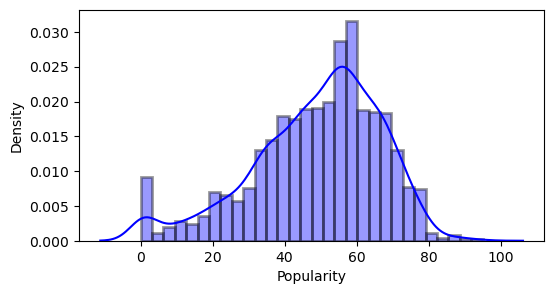

In [24]:
# Normal Distribution is observed for popularity showing data near the mean are more frequent in occurrence
plt.figure(figsize=[6,3])
sns.distplot(df1['Popularity'], color='b',hist_kws=dict(edgecolor="black",linewidth=2),bins=30)
plt.show()

## Feature Selection

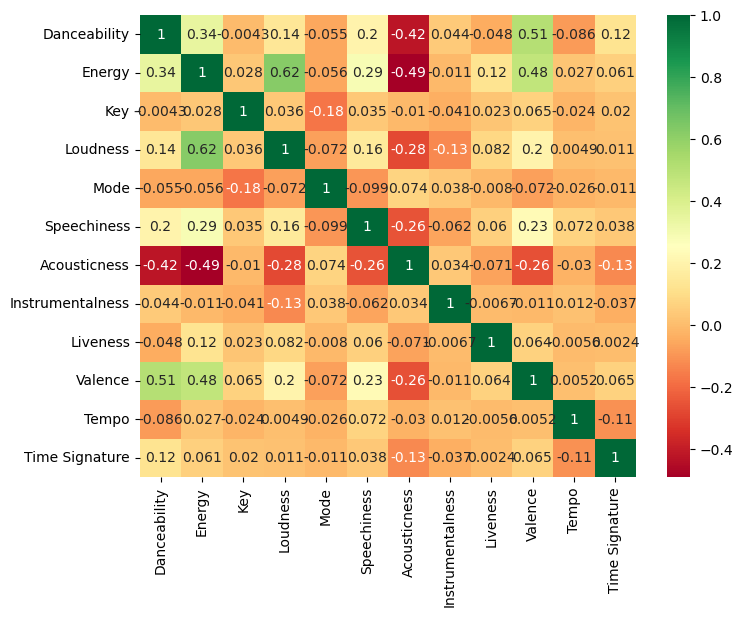

In [25]:
# Using Correlation matrix
corr_matrix = X.corr() 
indices = corr_matrix.index
plt.figure(figsize=[8,6])
sns.heatmap(X[indices].corr(), annot=True, cmap="RdYlGn")
plt.show()

In [26]:
# Getting the columns with highly correlated features
corr_matrix=X.corr().abs() # Convert everything to positive values
upper= corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)) # Consider only the upper triangle values
to_drop=[column for column in upper.columns if any(upper[column]>0.6)]
to_drop

C:\Users\noelm\AppData\Local\Temp\ipykernel_23808\3772953632.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper= corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)) # Consider only the upper triangle values


['Loudness']

In [27]:
X=X[['Danceability', 'Energy','Key', 'Mode', 'Speechiness','Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature']]
X.shape

(2478, 11)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
X

array([[-0.31500078, -0.66193869,  0.20738069, ...,  0.2067388 ,
         0.50641324,  0.16931883],
       [-2.6914234 , -0.41675422,  1.04752678, ..., -0.99375954,
         1.96342482, -2.96181604],
       [-0.88147361, -0.76118002, -0.91281409, ..., -1.35436551,
         0.98660489, -2.96181604],
       ...,
       [ 0.47944283,  1.32872566,  1.32757547, ...,  1.69937362,
        -0.8763048 ,  0.16931883],
       [ 0.52780027,  0.82084355, -0.3527167 , ...,  0.9233861 ,
         0.85033663,  0.16931883],
       [ 1.50876542, -1.14646989,  0.76747808, ...,  0.179351  ,
         1.02757534,  0.16931883]])

#### Using SelectKBest from scikitlearn to get the best features

In [261]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [262]:
k=10
X_new=SelectKBest(f_regression,k=k).fit_transform(X,Y)
selected_features = X.columns[SelectKBest(f_regression,k=k).fit(X,Y).get_support()]

In [263]:
X.columns[SelectKBest(f_regression,k=k).fit(X,Y).get_support()]

Index(['Danceability', 'Energy', 'Key', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
      dtype='object')

In [264]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

## Modelling

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train: (1982, 11)
X_test: (496, 11)
y_train (1982,)
y_test (496,)


### 1-Linear Regression

In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, lr_predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, lr_predictions))
r2_lr=r2_score(y_test, lr_predictions)

# Mean Absolute Error (MAE) is used to evaluate the accuracy of regression models. 
# It measures the average absolute difference between the predicted values and the actual target values.
print('Performance Metrics for Linear Regression:')
print('Mean Absolute Error (MAE) =', mae)
print('Root Mean Squared Error (RMSE) =',rmse)
print('R-squared (R2) =',r2_lr)

Performance Metrics for Linear Regression:
Mean Absolute Error (MAE) = 13.877628650377329
Root Mean Squared Error (RMSE) = 17.23234131301512
R-squared (R2) = 0.07856822945082553


In [32]:
# Create a DataFrame to store the predictions and actual values
results_df1 = pd.DataFrame({'Predicted Values': lr_predictions, 'Actual Values': y_test})

# Print the DataFrame
print(results_df1)

      Predicted Values  Actual Values
1112         52.081232           64.0
2398         52.445909           28.0
2445         48.561141           40.0
1240         48.053705           16.0
571          55.466320           48.0
...                ...            ...
1522         45.721257           51.0
1131         51.457009           52.0
132          50.905857           67.0
345          55.257229           61.0
2192         44.643314           27.0

[496 rows x 2 columns]


### 2-Random Forest

In [33]:
rfmodel = RandomForestRegressor()

In [34]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [35]:
hyperparameter_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
print(hyperparameter_grid)

{'n_estimators': [100, 181, 263, 345, 427, 509, 590, 672, 754, 836, 918, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
model=RandomizedSearchCV(estimator=rfmodel,param_distributions=hyperparameter_grid,scoring='neg_mean_squared_error',n_iter=5,cv=5,verbose=2,random_state=8)
model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=8, scoring='neg_mean_squared_error', verbose=2)

In [37]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=672; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=672; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=672; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=672; total time=   3.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=672; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=754; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=754; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=8, scoring='neg_mean_squared_error', verbose=2)

In [38]:
model.best_params_

{'n_estimators': 754,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 15}

In [39]:
rf_predictions = model.predict(X_test)
print(rf_predictions)

[55.81127659 51.945716   50.58947829 50.15689558 55.06442696 52.7779943
 52.66167292 47.72347281 45.68335977 52.27730727 44.91916602 51.22849888
 46.3628544  47.07859826 48.92709991 44.72689663 45.66429468 49.7047802
 39.12038475 50.33471801 46.73733996 47.90591895 47.40509164 40.91330101
 57.76726181 55.24281189 53.79648186 50.36150153 44.49476937 44.39162511
 44.73683819 46.0244701  42.73416756 47.26318835 52.19848589 49.93246707
 48.28203262 50.24554359 48.89822167 42.18010586 47.20870572 43.69839518
 56.58234964 47.72631333 45.0551989  61.22050699 49.90452267 53.43099032
 55.867331   50.1499132  48.80739432 52.82621755 45.05518195 51.4665782
 53.11326986 44.30401848 54.45119255 46.40110877 59.68693392 47.44817968
 43.15724287 48.05853355 45.09127422 55.29610978 56.66335053 45.54047332
 54.2176948  46.48246665 45.97179198 54.41983168 53.7464889  42.46381682
 53.20000371 49.97919498 54.34029419 44.83525668 55.78587794 49.11472289
 47.15930845 40.3829295  45.24011732 50.63567703 56.36

In [40]:
# Create a DataFrame to store the predictions and actual values
results_df = pd.DataFrame({'Predicted Values': rf_predictions, 'Actual Values': y_test})

# Print the DataFrame
print(results_df)

      Predicted Values  Actual Values
1112         55.811277           64.0
2398         51.945716           28.0
2445         50.589478           40.0
1240         50.156896           16.0
571          55.064427           48.0
...                ...            ...
1522         49.392315           51.0
1131         53.099808           52.0
132          50.068346           67.0
345          55.578464           61.0
2192         48.919136           27.0

[496 rows x 2 columns]


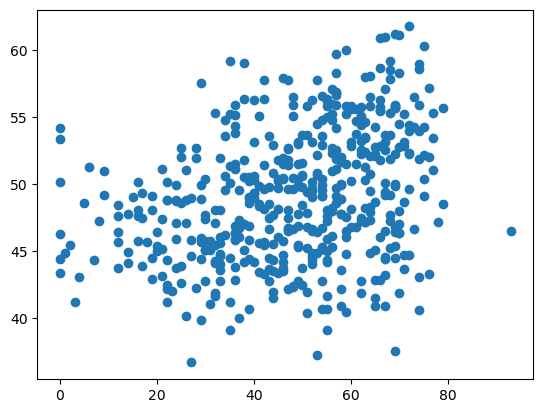

In [41]:
plt.scatter(y_test, rf_predictions)

In [42]:
mae_rf=metrics.mean_absolute_error(y_test, rf_predictions)
rmse_rf=np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
r2_rf=r2_score(y_test, rf_predictions)

print('Performance Metrics for Random Forest Regressor:')
print('Mean Absolute Error (MAE) =',mae_rf)
print('Root Mean Squared Error (RMSE) =',rmse_rf)
print('r2 square test =',r2_rf)

Performance Metrics for Random Forest Regressor:
Mean Absolute Error (MAE) = 13.641418746830162
Root Mean Squared Error (RMSE) = 17.088330402878135
r2 square test = 0.09390471256907651


### 3-Decision Tree

In [43]:
dt_model = DecisionTreeRegressor(random_state=0)

In [44]:
hyperparameter_grid = {
    'max_depth': [None] + [int(x) for x in np.linspace(5, 30, num=6)],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [45]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=hyperparameter_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Re-train the model with the best parameters
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)


Fitting 5 folds for each of 140 candidates, totalling 700 fits
Best parameters found:  {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 100}


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=100,
                      random_state=0)

In [46]:
# Make predictions
dt_predictions = best_dt_model.predict(X_test)

In [47]:
# Evaluate the model
mae_dt = metrics.mean_absolute_error(y_test, dt_predictions)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, dt_predictions))
r2_dt = r2_score(y_test, dt_predictions)
print('Performance Metrics for Decision Tree Regressor:')
print('Mean Absolute Error:', mae_dt)
print('Root Mean Squared Error:', rmse_dt)
print('R-squared (R2) test:', r2_dt)

Performance Metrics for Decision Tree Regressor:
Mean Absolute Error: 14.094667307202734
Root Mean Squared Error: 17.64992056440947
R-squared (R2) test: 0.03337033993221494


### 4-XGBoost

In [182]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the XGBRegressor model
xgmodel = xgb.XGBRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=xgmodel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5}


In [49]:
# Re-train the model with the best parameters
best_xgmodel = grid_search.best_estimator_
best_xgmodel.fit(X_train, y_train)

# Make predictions
xg_predictions = best_xgmodel.predict(X_test)

# Evaluate the model
xgmae = metrics.mean_absolute_error(y_test, xg_predictions)
xgrmse = np.sqrt(metrics.mean_squared_error(y_test, xg_predictions))
r2_xgb = r2_score(y_test, xg_predictions)

print('Mean Absolute Error:', xgmae)
print('Root Mean Squared Error (RMSE) =', xgrmse)
print('r2 square test =', r2_xgb)

Mean Absolute Error: 13.733958275087419
Root Mean Squared Error (RMSE) = 17.257893062407266
r2 square test = 0.0758336446756046


In [51]:
 from tabulate import tabulate

results = [
    ['Random Forest', mae_rf, rmse_rf, r2_rf],
    ['XGBoost', xgmae, xgrmse, r2_xgb],
    ['Linear Regression', mae, rmse, r2_lr],
    ['Decision Tree', mae_dt, rmse_dt, r2_dt],
]

print(tabulate(results, headers=['Model', 'Mean Absolute Error', 'Root Mean Squared Error', 'R-squared (R2)'], tablefmt='grid'))


+-------------------+-----------------------+---------------------------+------------------+
| Model             |   Mean Absolute Error |   Root Mean Squared Error |   R-squared (R2) |
+===================+=======================+===========================+==================+
| Random Forest     |               13.6414 |                   17.0883 |        0.0939047 |
+-------------------+-----------------------+---------------------------+------------------+
| XGBoost           |               13.734  |                   17.2579 |        0.0758336 |
+-------------------+-----------------------+---------------------------+------------------+
| Linear Regression |               13.8776 |                   17.2323 |        0.0785682 |
+-------------------+-----------------------+---------------------------+------------------+
| Decision Tree     |               14.0947 |                   17.6499 |        0.0333703 |
+-------------------+-----------------------+-------------------------

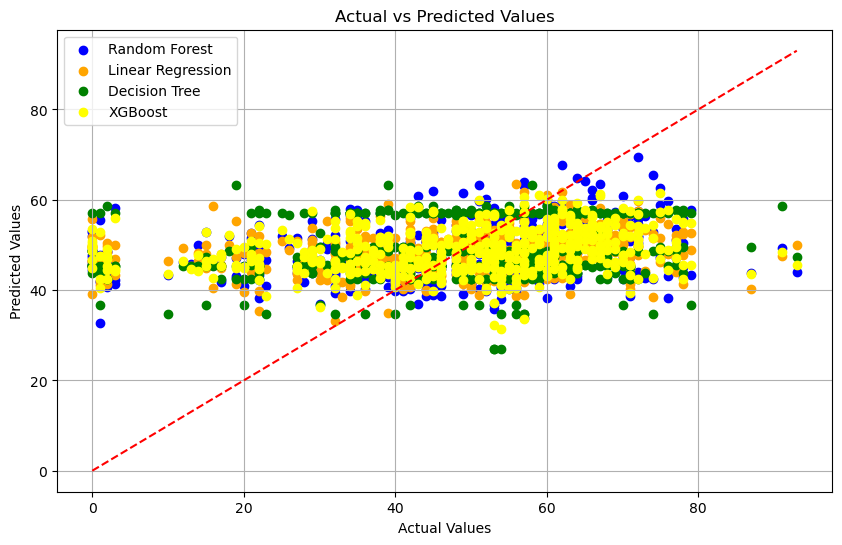

In [287]:
# scatter plots will show how well each model's predictions align with the actual values. 
# The diagonal dashed line represents perfect predictions, where actual values equal predicted values. 
# Points closer to this line indicate better model performance.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Random Forest')
plt.scatter(y_test, lr_predictions, color='orange', label='Linear Regression')
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.scatter(y_test, xg_predictions, color='yellow', label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Classification Analysis


In [452]:
df2 = df1.copy()

# Create a new column 'Popularity_binary' based on the condition
df2['Popularity_binary'] = df2['Popularity'].apply(lambda x: 1 if x > 35 else 0)

# Drop the original 'Popularity' column if you want
df2.drop('Popularity', axis=1, inplace=True)

# Display the new DataFrame
df2

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Popularity_binary
0,0.609,0.538,6,-7.842,1,0.0273,0.32800,0.000000,0.1250,0.608,130.015,4,1
1,0.265,0.580,9,-4.767,0,0.0491,0.49100,0.000000,0.2430,0.345,172.121,3,1
2,0.527,0.521,2,-6.837,0,0.0272,0.63100,0.000000,0.1580,0.266,143.892,3,1
3,0.622,0.516,7,-7.514,1,0.0259,0.42900,0.000652,0.4660,0.399,80.013,4,0
4,0.702,0.860,7,-3.969,1,0.0345,0.36100,0.000001,0.1330,0.829,120.042,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0.738,0.784,2,-7.172,1,0.3290,0.10500,0.000008,0.5720,0.751,81.961,4,0
2474,0.707,0.632,6,-8.734,0,0.3590,0.00159,0.000000,0.0794,0.711,163.954,4,0
2475,0.724,0.879,10,-8.217,1,0.0863,0.08000,0.000000,0.4520,0.935,90.056,4,1
2476,0.731,0.792,4,-6.560,0,0.1940,0.01210,0.000011,0.3840,0.765,139.954,4,0


In [453]:
# Count the number of popular (1) and unpopular (0) songs
popularity_counts = df2['Popularity_binary'].value_counts()

# Display the counts
print("Number of popular songs (1):", popularity_counts[1])
print("Number of unpopular songs (0):", popularity_counts[0])

Number of popular songs (1): 1965
Number of unpopular songs (0): 513


In [454]:
df2.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Time Signature', 'Popularity_binary'],
      dtype='object')

In [455]:
X1 = df2.iloc[:, np.r_[0:12]]
Y1 = df2.iloc[:, 12]
print(X1.shape, Y1.shape)

(2478, 12) (2478,)


In [456]:
X1

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,0.609,0.538,6,-7.842,1,0.0273,0.32800,0.000000,0.1250,0.608,130.015,4
1,0.265,0.580,9,-4.767,0,0.0491,0.49100,0.000000,0.2430,0.345,172.121,3
2,0.527,0.521,2,-6.837,0,0.0272,0.63100,0.000000,0.1580,0.266,143.892,3
3,0.622,0.516,7,-7.514,1,0.0259,0.42900,0.000652,0.4660,0.399,80.013,4
4,0.702,0.860,7,-3.969,1,0.0345,0.36100,0.000001,0.1330,0.829,120.042,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0.738,0.784,2,-7.172,1,0.3290,0.10500,0.000008,0.5720,0.751,81.961,4
2474,0.707,0.632,6,-8.734,0,0.3590,0.00159,0.000000,0.0794,0.711,163.954,4
2475,0.724,0.879,10,-8.217,1,0.0863,0.08000,0.000000,0.4520,0.935,90.056,4
2476,0.731,0.792,4,-6.560,0,0.1940,0.01210,0.000011,0.3840,0.765,139.954,4


In [457]:
Y1

0       1
1       1
2       1
3       0
4       1
       ..
2473    0
2474    0
2475    1
2476    0
2477    1
Name: Popularity_binary, Length: 2478, dtype: int64

In [458]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1,test_size=0.2)
print("X1_train:",X1_train.shape)
print("X1_test:",X1_test.shape)
print("y1_train",y1_train.shape)
print("y1_test",y1_test.shape)

X1_train: (1982, 12)
X1_test: (496, 12)
y1_train (1982,)
y1_test (496,)


### Decision Tree Classifier

In [459]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [460]:
dt= DecisionTreeClassifier()
dt.fit(X1_train,y1_train)
y_pred=dt.predict(X1_test)
DecisionTree_score=dt.score(X1_test,y1_test)
print("Train accuracy of decision tree:",dt.score(X1_train,y1_train))
print("Test accuracy of decision tree:",dt.score(X1_test,y1_test))

Train accuracy of decision tree: 0.9984863773965691
Test accuracy of decision tree: 0.6411290322580645


In [461]:
max_depth = [8,10,12]
min_samples_split = [8,10,12]
min_samples_leaf=[1,2,3,4]
parameters = dict(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

In [462]:
tree_clf = DecisionTreeClassifier()
tree_clf_gs = GridSearchCV(tree_clf, parameters)
tree_clf_gs.fit(X1_train,y1_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [8, 10, 12]})

In [463]:
print('Best max_depth:', tree_clf_gs.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', tree_clf_gs.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', tree_clf_gs.best_estimator_.get_params()['min_samples_leaf'])

Best max_depth: 8
Best min_samples_split: 12
Best min_samples_leaf: 1


In [464]:
from sklearn.tree import plot_tree
tree_clf = DecisionTreeClassifier(max_depth=10, max_features='auto', criterion='gini', min_samples_leaf=1, min_samples_split=12)
tree_clf.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=12)

In [465]:
from sklearn.tree import export_graphviz
import graphviz

# Generate DOT data
dot_data = export_graphviz(tree_clf, filled=True, feature_names=X1_train.columns)

# Convert DOT data to a graph
graph = graphviz.Source(dot_data)

# Save the graph as a pdf file
graph.render("decision_tree_visualization", format='pdf')



'decision_tree_visualization.pdf'

In [466]:
print(tree_clf.tree_.max_depth)

10


In [467]:
y_pred = tree_clf.predict(X1_test)
print("Tuned Decision Tree Testing Accuracy=",accuracy_score(y1_test, y_pred))

Tuned Decision Tree Testing Accuracy= 0.7258064516129032


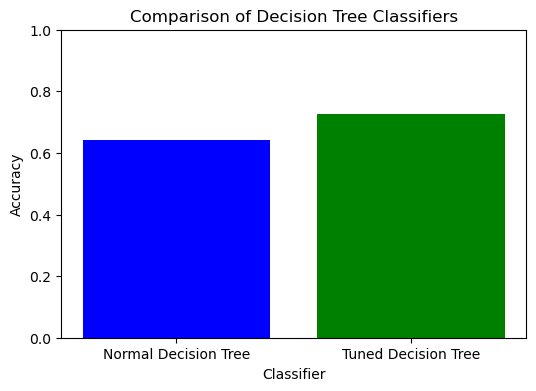

In [472]:
import matplotlib.pyplot as plt

# Define labels and scores
labels = ['Normal Decision Tree', 'Tuned Decision Tree']
scores = [DecisionTree_score, accuracy_score(y1_test, y_pred)]

# Plot the bar plot
plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Decision Tree Classifiers')
plt.ylim(0.0, 1.0)
plt.show()


In [479]:
print(confusion_matrix(y1_test, y_pred))
print("Classification report\n")
print(classification_report(y1_test, y_pred))

[[ 11 106]
 [ 30 349]]
Classification report

              precision    recall  f1-score   support

           0       0.27      0.09      0.14       117
           1       0.77      0.92      0.84       379

    accuracy                           0.73       496
   macro avg       0.52      0.51      0.49       496
weighted avg       0.65      0.73      0.67       496



### Naive Bayes Classifier

In [434]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X1_train,y1_train)
print("Train accuracy of naive bayes:",nb.score(X1_train,y1_train))
print("Test accuracy of naive bayes:",nb.score(X1_test,y1_test))
NaiveBayes_score=nb.score(X1_test,y1_test)

Train accuracy of naive bayes: 0.784561049445005
Test accuracy of naive bayes: 0.7762096774193549


In [484]:
nb_y_pred = nb.predict(X1_test)
report = classification_report(y1_test, nb_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.42      0.09      0.14       117
           1       0.77      0.96      0.86       379

    accuracy                           0.76       496
   macro avg       0.59      0.52      0.50       496
weighted avg       0.69      0.76      0.69       496



### Logistic regression

In [443]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X1_train, y1_train)
train_accuracy_log_reg = log_reg.score(X1_train, y1_train)
test_accuracy_log_reg = log_reg.score(X1_test, y1_test)
print("Train accuracy of Logistic Regression:", train_accuracy_log_reg)
print("Test accuracy of Logistic Regression:", test_accuracy_log_reg)
LogisticRegression_score=log_reg.score(X1_test,y1_test)

Train accuracy of Logistic Regression: 0.7926337033299697
Test accuracy of Logistic Regression: 0.7883064516129032


In [485]:
lr_y_pred = log_reg.predict(X1_test)
report = classification_report(y1_test, lr_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.76      0.99      0.86       379

    accuracy                           0.76       496
   macro avg       0.38      0.50      0.43       496
weighted avg       0.58      0.76      0.66       496



### KNN

In [448]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1_train, y1_train)
train_accuracy_knn = knn.score(X1_train, y1_train)
test_accuracy_knn = knn.score(X1_test, y1_test)
print("Train accuracy of KNN:", train_accuracy_knn)
print("Test accuracy of KNN:", test_accuracy_knn)
KNN_score=knn.score(X1_test,y1_test)

Train accuracy of KNN: 0.806760847628658
Test accuracy of KNN: 0.7681451612903226


C:\Users\noelm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\noelm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [486]:
knn_y_pred = knn.predict(X1_test)
report = classification_report(y1_test, knn_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.13      0.21       117
           1       0.78      0.97      0.87       379

    accuracy                           0.77       496
   macro avg       0.68      0.55      0.54       496
weighted avg       0.73      0.77      0.71       496



C:\Users\noelm\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Random Forest Classifier

In [435]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(X1_train,y1_train)
print("Train accuracy of random forest",rf.score(X1_train,y1_train))
print("Test accuracy of random forest",rf.score(X1_test,y1_test))
RandomForestClassifier_score=rf.score(X1_test,y1_test)
rf_y_pred=rf.predict(X1_test)
t_true=y_test

Train accuracy of random forest 0.9984863773965691
Test accuracy of random forest 0.7903225806451613


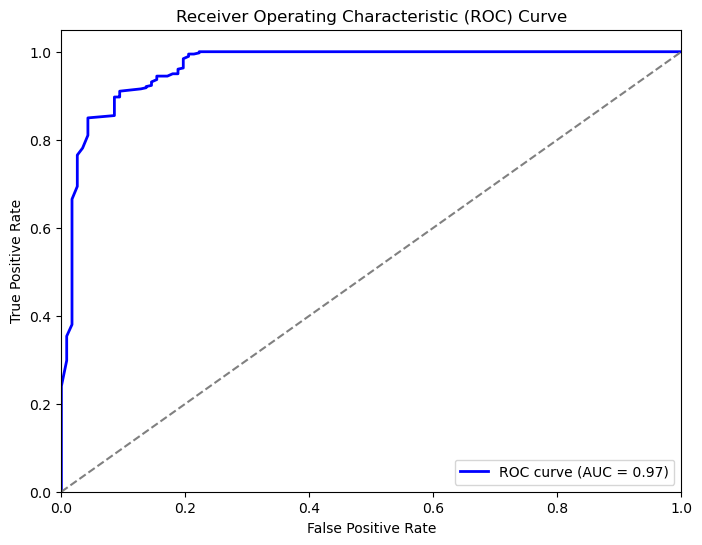

In [470]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
rf_probs = rf.predict_proba(X1_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y1_test, rf_probs)

# Calculate the AUC score
auc = roc_auc_score(y1_test, rf_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [473]:
print(confusion_matrix(y1_test, rf_y_pred))
print("Classification report\n")
print(classification_report(y1_test, rf_y_pred))

[[  1 116]
 [  6 373]]
Classification report

              precision    recall  f1-score   support

           0       0.14      0.01      0.02       117
           1       0.76      0.98      0.86       379

    accuracy                           0.75       496
   macro avg       0.45      0.50      0.44       496
weighted avg       0.62      0.75      0.66       496



### Ensemble Model

In [450]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Random Forest', rf), ('Logistic Regression', log_reg)], 
                          voting='soft', weights=[2,1]).fit(X1_train,y1_train)
print('The train accuracy for Random Forest and Logistic Regression is:',ensemble.score(X1_train,y1_train))
print('The test accuracy for Random Forest and Logistic Regression is:',ensemble.score(X1_test,y1_test))
ensemble_score=ensemble.score(X1_test,y1_test)

The train accuracy for Random Forest and Logistic Regression is: 0.9772956609485368
The test accuracy for Random Forest and Logistic Regression is: 0.7923387096774194


In [451]:
model_performances=pd.DataFrame({'Model':['Random Forest Classifier','Desicion Tree Classifier','Naive Bayes', 'Logistic Regression', 'KNN','Ensemble Model'],
                                  'Accuracy':[RandomForestClassifier_score, DecisionTree_score, NaiveBayes_score, LogisticRegression_score, KNN_score, ensemble_score]})
model_performances.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
5,Ensemble Model,0.792339
0,Random Forest Classifier,0.790323
3,Logistic Regression,0.788306
2,Naive Bayes,0.776210
4,KNN,0.768145
1,Desicion Tree Classifier,0.687500


### Conclusion

We tried to predict popular songs using audio features by regressional analysis. Then we converted the target variable to a binary column, 1 representing all popular songs and 0 representing all unpopular songs. Although accusticness is the most important of these features did not lead us to a strong result. We had around 4000 songs available in our initial dataset. Decision Tree algorithms mainly give better results when we don’t have so much data but we got the best result with Random Forest. There were no strong linear correlations in our data, so linear methods like linear regression did not fit well. 